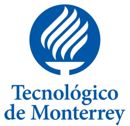

# **Maestría en Inteligencia Artificial Aplicada**
## **Curso: Navegación autónoma**
### Tecnológico de Monterrey
###  	Dr. David Antonio Torres

#### **Actividad 3.1 - Detección de Peatones con SVM**
____


**Nombres y matrículas de los integrantes del equipo:**

*   Julio Cesar Lynn Jimenez A01793660
*   Francisco Javier Parga García A01794380
*   Carlos Roberto Torres Ferguson A01215432
*   Fernando Sebastian Sanchez Cardona A01687530

____

### Ajustes para correr en Google-Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Libreria para manipular variables de sistema
import os

# Seteo del folder de inters
os.chdir("/content/drive/MyDrive/Colab Notebooks/MNA/03_2023-Abril-Julio/Navegacion_Autonoma/02_Deteccion_de_Peatones")

In [ ]:
!ls -lart data/

total 1315331
-rw------- 1 root root 1278503356 May 21 10:49 INRIAPerson.zip
drwx------ 2 root root       4096 May 21 12:07 INRIAPerson
-rw------- 1 root root   68390816 May 21 13:01 video_2_2.mp4


In [ ]:
# Datos:
# https://github.com/vinay0410/Pedestrian_Detection

#!unzip -q data/INRIAPerson.zip -d data/

# 0. Librerias requerias

In [ ]:
# Instalar bibliotecas requeridas
!pip install -q scikit-image
!pip install -q seaborn
!pip install -q opencv-python

In [ ]:
# Cargar librerias

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cv2
from skimage.feature import hog
import glob

from matplotlib import rcParams
rcParams['figure.figsize'] = (5,3)

# 1. Carga de datos de peatones

In [ ]:
# Reemplazar las fuentes de datos de vehículos y no vehículos con el Conjunto de Datos de Personas INRIA
pedestrian = glob.glob("data/INRIAPerson/Train/pos/*.png")
non_pedestrian = glob.glob("data/INRIAPerson/Train/neg/*.png")

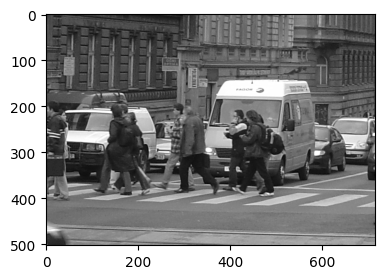

In [ ]:
# Leer y mostrar una imagen de peatón en color
img_color = cv2.imread(pedestrian[0])
plt.imshow(img_color)

# Convertir y mostrar la imagen de peatón en escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray");

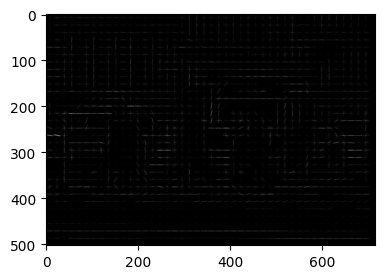

In [ ]:
# Extraer y mostrar las características HOG para la imagen de no peatón
features,hog_img = hog(img_gray, orientations = 11, 
                       pixels_per_cell = (16,16), 
                       cells_per_block = (2,2), 
                       transform_sqrt = False, 
                       visualize = True, 
                       feature_vector = True)

plt.imshow(hog_img,cmap = 'gray');

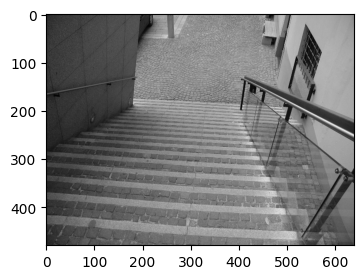

In [ ]:
# Leer y mostrar una imagen de no peatón en color
img_color = cv2.imread(non_pedestrian[0])
plt.imshow(img_color)

# Convertir y mostrar la imagen de no peatón en escala de grises
img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap="gray");

## Caracteristicas HOG de imagen sin peatones

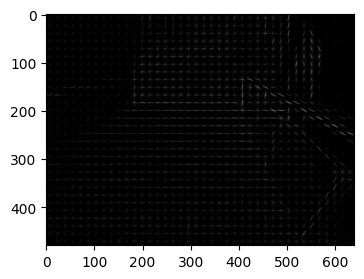

In [ ]:
# Extraer y mostrar las características HOG para la imagen de no peatón
features,hog_img = hog(img_gray, orientations = 11, 
                       pixels_per_cell = (16,16), 
                       cells_per_block = (2,2), 
                       transform_sqrt = False, 
                       visualize = True, 
                       feature_vector = True)

plt.imshow(hog_img,cmap = 'gray');

# 2. Propiedades de imagenes con y sin peatones

## Peatones

In [ ]:
# Inicializar una lista vacía para almacenar las características HOG para las imágenes de peatones
pedestrian_hog_accum = []

# Extraer las características HOG para las imágenes de peatones
for i in pedestrian:
  # Leer la imagen en color
  img_color = mpimg.imread(i)
  # Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
  img_color = cv2.resize(img_color, (64, 128))
  # Convertir la imagen a escala de grises
  img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
  # Extraer y visualizar las características HOG para la imagen
  pedestrian_hog_feature, pedestrian_hog_img = hog(img_gray, 
                                                   orientations = 11, 
                                                   pixels_per_cell = (16,16), 
                                                   cells_per_block = (2,2), 
                                                   transform_sqrt = False, 
                                                   visualize = True, 
                                                   feature_vector = True)
  # Añadir las características HOG a la lista
  pedestrian_hog_accum.append(pedestrian_hog_feature)

In [ ]:
# Apilar las características HOG en un array de numpy y convertirlo a tipo float
X_pedestrian = np.vstack(pedestrian_hog_accum).astype(np.float64)
# Crear un array de numpy de ceros como las etiquetas para las imágenes de peatones
y_pedestrian = np.ones(len(X_pedestrian))

## NO - Peatones

In [ ]:
# Inicializar una lista vacía para almacenar las características HOG para las imágenes de no peatones
non_pedestrian_hog_accum = []

# Extraer las características HOG para las imágenes de no peatones
for i in non_pedestrian:
  # Leer la imagen en color
  img_color = mpimg.imread(i)
 
  # Cambiar el tamaño de la imagen a un tamaño fijo (por ejemplo, (64, 64))
  img_color = cv2.resize(img_color, (64, 128))
 
  # Convertir la imagen a escala de grises
  img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
 
  # Extraer y visualizar las características HOG para la imagen
  non_pedestrian_hog_feature, non_pedestrian_hog_img = hog(img_gray,
                                                            orientations = 11,
                                                            pixels_per_cell = (16,16),
                                                            cells_per_block = (2,2),
                                                            transform_sqrt = False,
                                                            visualize = True,
                                                            feature_vector = True)
 
  # Añadir las características HOG a la lista
  non_pedestrian_hog_accum.append(non_pedestrian_hog_feature)

In [ ]:
# Apilar las características HOG en un array de numpy y convertirlo a tipo float
X_non_pedestrian = np.vstack(non_pedestrian_hog_accum).astype(np.float64)
# Crear un array de numpy de ceros como las etiquetas para las imágenes de no peatones
y_non_pedestrian = np.zeros(len(X_non_pedestrian))

In [ ]:
# Combinar los datos de peatones y no peatones
X = np.vstack((X_pedestrian,X_non_pedestrian))
y = np.hstack((y_pedestrian,y_non_pedestrian))

# 3. Separacion del dato para entrenamiento y prueba

In [ ]:
# Importar la biblioteca para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Dividir los datos en un 70% de entrenamiento y un 30% de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 4. Modelo SVC

In [ ]:
# Importar la biblioteca para el clasificador de vectores de soporte
from sklearn.svm import SVC

# Crear una instancia de SVC con los parámetros por defecto
svc_model = SVC()
# Entrenar el modelo en el conjunto de entrenamiento
svc_model.fit(X_train,y_train)
# Predecir las etiquetas en el conjunto de prueba
y_predict = svc_model.predict(X_test)

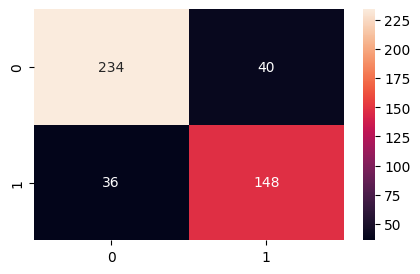

In [ ]:
# Importar las bibliotecas para las métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix

# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d");

In [ ]:
# Imprimir el informe de clasificación
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       274
         1.0       0.79      0.80      0.80       184

    accuracy                           0.83       458
   macro avg       0.83      0.83      0.83       458
weighted avg       0.83      0.83      0.83       458



## Optimizacion de hiper-parametros

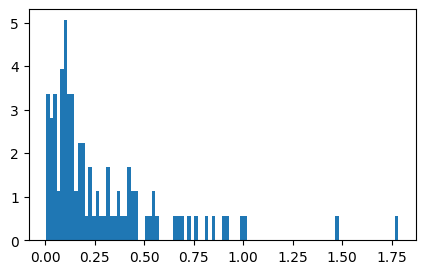

In [ ]:
# Distribucion aleatoria para busqueda de hiperparametros numericos
mu, sigma = 3., 1.
s = np.random.lognormal(mu, sigma, 100)/107
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

In [ ]:
# Diccionario con la combinación de hiperparámetros a utilizar para entrenar los modelos de la malla.
param_grid = {'gamma': np.random.lognormal(mu, sigma, 100)/17,
              'C': np.random.lognormal(mu, sigma, 100)*17,
              'coef0': np.random.lognormal(mu, sigma, 100)/107,
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
              }

In [ ]:
%%time
# Importar la biblioteca para la validación cruzada con búsqueda en malla
from sklearn.model_selection import RandomizedSearchCV

# Crear una instancia de RandomizedSearchCV con SVC como el estimador y param_grid como la malla aleatorea de parámetros
random_search = RandomizedSearchCV(svc_model, 
                                   param_grid, 
                                   n_iter=207,
                                   cv=5, 
                                   n_jobs=-1,
                                   return_train_score=True,
                                   random_state=0,
                                   refit=True,
                                   verbose=1)

# Entrenar los modelos en el conjunto de entrenamiento usando la búsqueda en malla
random_search.fit(X_train,y_train)

print("Best parameter (CV score=%0.3f):" % random_search.best_score_)
print(random_search.best_params_)

Fitting 5 folds for each of 207 candidates, totalling 1035 fits
Best parameter (CV score=0.876):
{'kernel': 'rbf', 'gamma': 0.20996162652111283, 'coef0': 0.6242805215867533, 'C': 536.7664762803996}
CPU times: user 4.32 s, sys: 465 ms, total: 4.79 s
Wall time: 7min 59s


In [ ]:
# Imprimir los mejores parámetros encontrados por la búsqueda en malla
random_search.best_params_

{'kernel': 'rbf',
 'gamma': 0.20996162652111283,
 'coef0': 0.6242805215867533,
 'C': 536.7664762803996}

In [ ]:
# Asignar el modelo a la variable svc_grid
svc_grid = random_search.best_estimator_

In [ ]:
# Predecir las etiquetas en el conjunto de prueba usando el mejor modelo
grid_predictions = svc_grid.predict(X_test)

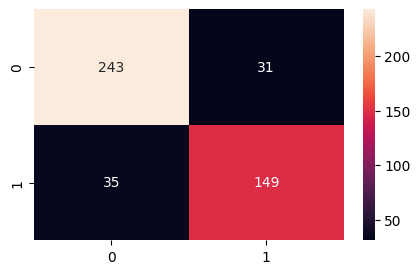

In [ ]:
# Calcular y mostrar la matriz de confusión
cm = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cm, annot=True, fmt = "d");

In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       274
         1.0       0.83      0.81      0.82       184

    accuracy                           0.86       458
   macro avg       0.85      0.85      0.85       458
weighted avg       0.86      0.86      0.86       458



# 6. Modificaciones sobre código original para la detección de peatones
____
>Las principales modificaciones realizadas en el código para adaptarlo a la detección de peatones fueron al procesamiento del conjunto de datos seleccionado, el cual corresponde a INRIA Person disponible en https://github.com/vinay0410/Pedestrian_Detection.

>Este conjunto de datos consiste en imágenes etiquetadas como "positivas" que contienen personas, las cuales se utilizan para entrenar modelos de detección de peatones. También incluye imágenes de calles, paisajes y otras fotografías sin presencia de personas ni objetos similares a personas, las cuales se etiquetan como "negativas".
____

## Clase PedestrianDetector()

In [ ]:
# Cargar librerias adicionales para la deteccion de peatones

import cv2
import numpy as np
from skimage.feature import hog
from tqdm import tqdm

# Definir una clase para la detección de peatones
class PedestrianDetector:
  # Inicializar la clase con un modelo
  def __init__(self, model):
    self.model = model

  # Definir un método para procesar un solo fotograma de una imagen
  def process_frame(self, img):
    '''
    Este método aplica una ventana deslizante sobre la imagen y predice si cada región contiene un 
    peatón usando el modelo y las características HOG. Si se detecta un peatón, 
    dibuja un rectángulo verde alrededor de la región.

    Entradas: 
      img - Una imagen en formato BGR de tipo numpy array
    Salidas: 
      img - La misma imagen con los rectángulos dibujados si se detectan peatones

    '''

    # Definir los parámetros para la ventana deslizante
    window_size = (64, 128) # Tamaño de la ventana deslizante
    step_size = 128 # Tamaño del paso de la ventana deslizante

    # Calcular la coordenada y inicial para la ventana deslizante
    start_y = img.shape[0] // 2
    end_y = int(img.shape[0] * 0.75)

    # Deslizar la ventana sobre la imagen
    for y in range(start_y, end_y, step_size):
      for x in range(0, img.shape[1], step_size):
        # Extraer la región de interés
        roi = img[y:y + window_size[1], x:x + window_size[0]]
        
        # Saltar si la región de interés no tiene el mismo tamaño que la ventana
        if roi.shape[0] != window_size[1] or roi.shape[1] != window_size[0]:
          continue
        
        # Convertir la región de interés a escala de grises
        roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        
        # Calcular las características HOG para la región de interés
        roi_hog_feature, _ = hog(roi_gray,
                                  orientations=11,
                                  pixels_per_cell=(16, 16),
                                  cells_per_block=(2, 2),
                                  transform_sqrt=False,
                                  visualize=True,
                                  feature_vector=True)
        
        # Predecir si la región de interés contiene un peatón
        y_pred = self.model.predict(roi_hog_feature.reshape(1, -1))
        
        # Si se detecta un peatón, dibujar un rectángulo alrededor de la región de interés
        if y_pred == 1:
          cv2.rectangle(img, (x, y), (x + window_size[0], y + window_size[1]), (0, 255, 0), 2)
        
    return img


  # Definir un método para procesar un archivo de vídeo y guardar el resultado
  def process_video(self, input_video_path, output_video_path):
    '''
    Este método lee un archivo de vídeo de entrada fotograma a fotograma y llama al 
    método process_frame para cada fotograma. Luego escribe el fotograma procesado 
    en un archivo de vídeo de salida. 
    También muestra una barra de progreso y el fotograma procesado en pantalla.

    Entradas: 
      input_video_path - La ruta del archivo de vídeo de entrada como una cadena
      output_video_path - La ruta del archivo de vídeo de salida como una cadena

    Salidas: 
      Ninguna

    '''
    # Abrir el archivo de vídeo de entrada
    cap = cv2.VideoCapture(input_video_path)
    
    # Obtener el ancho, el alto y los fps del archivo de vídeo de entrada
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calcular el número de fotogramas a procesar (25% del total de fotogramas)
    num_frames_to_process = int(total_frames * 0.25)

    # Definir el códec y crear un objeto escritor de vídeo para el archivo de vídeo de salida
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Crear una barra de progreso para mostrar el estado del procesamiento
    pbar = tqdm(total=num_frames_to_process, ncols=80, bar_format='{l_bar}{bar}| {n_fmt}/{total_fmt}',  position=0, leave=True)

    frame_count = 0

    while cap.isOpened():
      # Leer un fotograma del archivo de vídeo de entrada
      ret, frame = cap.read()
      if ret:
        # Procesar el fotograma usando el método process_frame
        result_frame = self.process_frame(frame)
        # Escribir el fotograma procesado en el archivo de vídeo de salida
        out.write(result_frame)
        # Mostrar el fotograma procesado en pantalla
        #cv2.imshow('Processed Frame', result_frame)

        pbar.update(1)
        frame_count += 1

        if frame_count >= num_frames_to_process:
          break

        if cv2.waitKey(1) & 0xFF == ord('q'):
          break
      else:
        break

    pbar.close()

    # Liberar los objetos de captura y escritura de vídeo y cerrar todas las ventanas
    cap.release()
    out.release()
    cv2.destroyAllWindows()

## Procesamiento del video

In [ ]:
# Definir las rutas de los archivos de vídeo de entrada y salida
input_video_path = 'data/video_2_2.mp4'
output_video_path = 'output/video_2_2_process.mp4'

# Crear una instancia de PedestrianDetector con svc_model como el modelo a usar
pedestrian_detector = PedestrianDetector(svc_grid)

# Procesar el archivo de vídeo de entrada y guardar el archivo de vídeo de salida usando el método process_video
pedestrian_detector.process_video(input_video_path, output_video_path)

100%|██████████████████████████████████████████████████████████████████| 917/917
